Import the necessary libraries.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [3]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


First look at its main features (head, shape, info).


In [10]:
pd.set_option('display.max_columns', None)
customer_df.head(40)
customer_df.shape
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)


In [11]:
columnnames = [column.replace(' ','_').lower() for column in customer_df.columns]
customer_df.columns = columnnames

Change effective to date column to datetime format.


In [12]:
data1 = []

for row in customer_df['effective_to_date']:
    month, day, year = row.split('/')
    year = '20' + year
    data1.append(datetime.datetime(int(year), int(month), int(day)))

customer_df['effective_to_date'] = data1

customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [13]:
#we need to use the numerical columns for this matterç
num_df = customer_df.select_dtypes(include = np.number)

num_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [14]:
for column in num_df:
    print (column, ' ', len(pd.unique(num_df[column])))

customer_lifetime_value   8041
income   5694
monthly_premium_auto   202
months_since_last_claim   36
months_since_policy_inception   100
number_of_open_complaints   6
number_of_policies   9
total_claim_amount   5106


In [17]:
def discont(dataframe):
    
    if len(list(dataframe.select_dtypes(object))) > 0:
        discrete_df = dataframe.select_dtypes(include = object)
    else: 
        discrete_df = pd.DataFrame()
        
    continuous_df = pd.DataFrame()
    
    numerical_df = dataframe.select_dtypes(include = np.number)
    
    
    for column in numerical_df:
        if len(pd.unique(numerical_df[column])) < 150: 
            discrete_df = pd.concat([discrete_df, dataframe[column]], axis = 1)
        else: 
            continuous_df = pd.concat([continuous_df, dataframe[column]], axis = 1)   
    
    return continuous_df, discrete_df

In [19]:
continuous_df, discrete_df = discont(num_df)
discrete_df.head()


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


Plot a correlation matrix, comment what you see.


<AxesSubplot:>

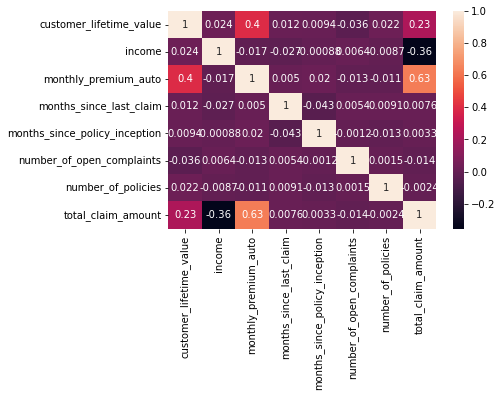

In [20]:
sns.heatmap(customer_df.corr(),annot=True)

Possitive and negative correlations most of them very low. The largest correlations are driven by, total claim amount and monthly premium auto

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)


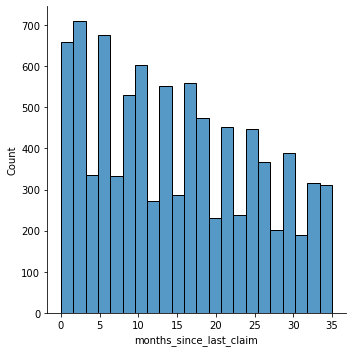

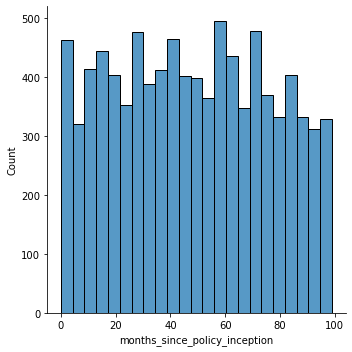

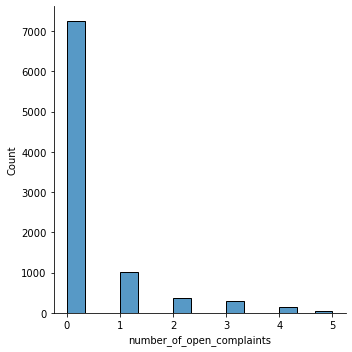

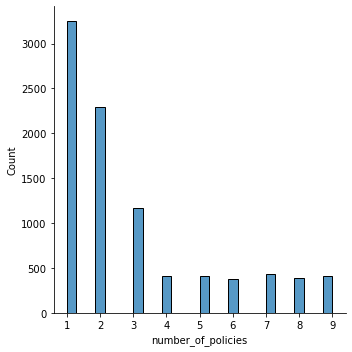

In [23]:
def discreteplot(dataframe):
    for column in dataframe: 
        sns.displot(dataframe[column])
        plt.show()
    return
discreteplot(discrete_df)


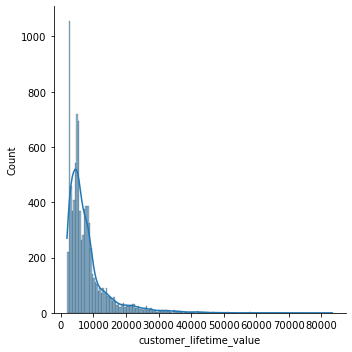

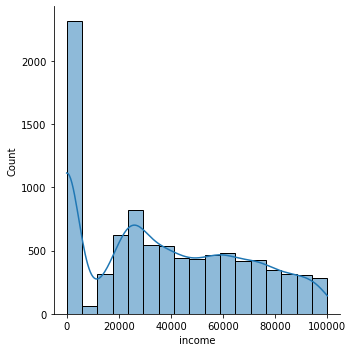

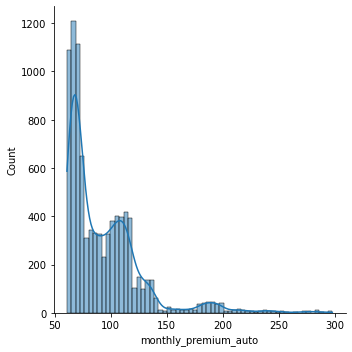

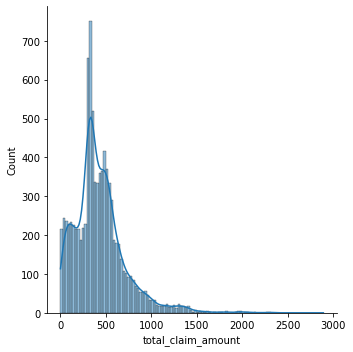

In [24]:
def contplot(dataframe):
    for column in dataframe: 
        sns.displot(dataframe[column], kde = True)
        plt.show()
    return
contplot(continuous_df)


Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)


C:\Users\jorge\Desktop\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


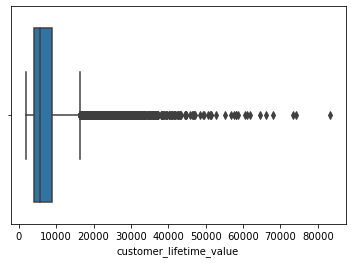

C:\Users\jorge\Desktop\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


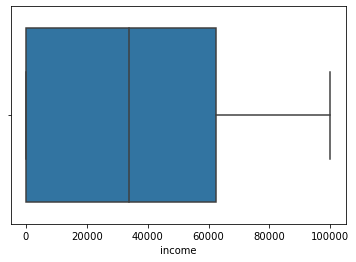

C:\Users\jorge\Desktop\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


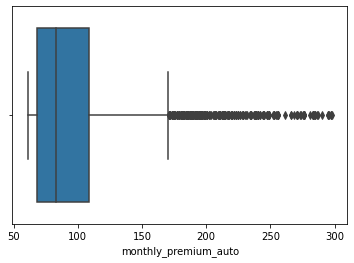

C:\Users\jorge\Desktop\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


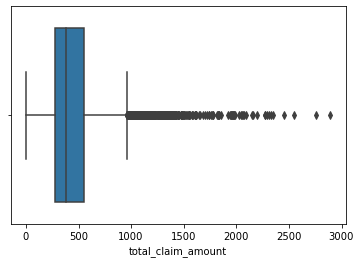

In [25]:
def contboxplot(dataframe):
    for column in dataframe: 
        sns.boxplot(dataframe[column]).set(xlabel = column)
        plt.show()
    return

contboxplot(continuous_df)

It would be better to eliminate outliers from total claim amount and customer lifetime value because there exists outliers. They are high and are placed in the outside part of the spectrum. 


Check all columns for NaN values. Decide what (if anything) you will need to do with them.


In [26]:
customer_df.isna().sum()


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

There is no need to replace or delete because there are no NaNs